In [51]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [52]:
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [53]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Preprocessing

In [54]:
pd.set_option('display.max_rows', None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

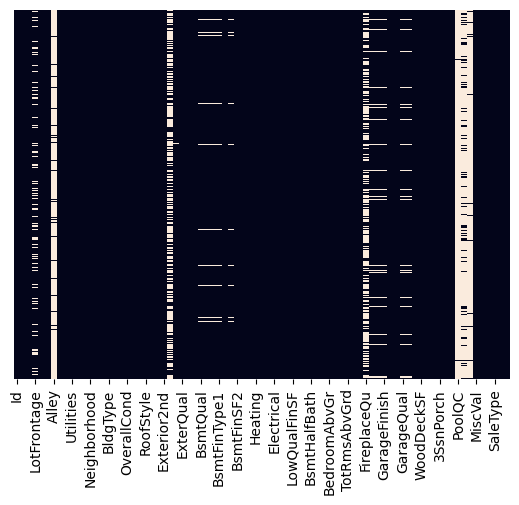

In [55]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [58]:
data.drop(['Alley'], axis=1, inplace=True)

In [59]:
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['FireplaceQu'] = data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])

In [60]:
data.drop(['GarageYrBlt'], axis=1, inplace=True)

In [61]:
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [62]:
data.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [63]:
data.drop(['Id'], axis=1, inplace=True)

In [64]:
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

<Axes: >

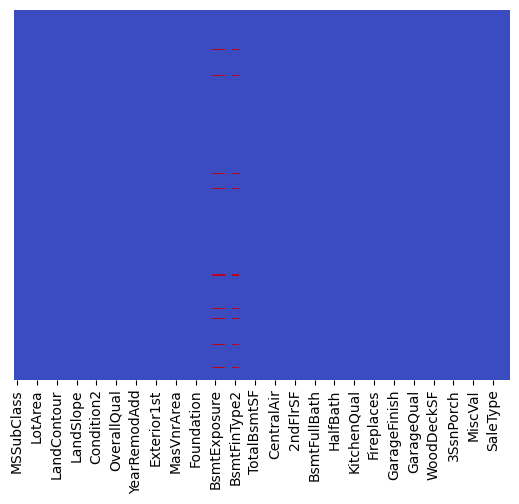

In [65]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')

In [66]:
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

In [67]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

In [68]:
data.dropna(inplace=True)

In [69]:
data.shape

(1422, 75)

Handle categorical features

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   LotShape       1422 non-null   object 
 6   LandContour    1422 non-null   object 
 7   Utilities      1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemodAdd 

In [71]:
category_columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition2','BldgType','Condition1',
           'HouseStyle','SaleType', 'SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
           'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [72]:
len(category_columns)

39

In [73]:
main_data = data.copy()

In [74]:
test_df = pd.read_csv('TestData.csv')

In [75]:
test_df.shape

(1459, 74)

In [76]:
final_data = pd.concat([data, test_df], axis=0)

In [77]:
def encode_category_columns(columns):
    df = final_data
    i = 0

    for fields in columns:
        #print(fields)
        df1 = pd.get_dummies(final_data[fields], drop_first=True)
        final_data.drop([fields], axis=1, inplace=True)
        
        if i == 0:
            df = df1.copy()
        else:
            df = pd.concat([df, df1],axis=1)
        
        i = i + 1
       
    df = pd.concat([final_data,df],axis=1)
        
    return df

In [78]:
final_data = encode_category_columns(category_columns)

In [79]:
final_data.shape

(2881, 234)

In [80]:
final_data = final_data.loc[:, ~final_data.columns.duplicated()]

In [81]:
final_data.isnull().sum()

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
FV                  0
RH                  0
RL                  0
RM                  0
Pave                0
IR2                 0
IR3                 0
Reg                 0
HLS                 0
Low       

In [82]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2881 entries, 0 to 1458
Columns: 174 entries, MSSubClass to P
dtypes: bool(138), float64(11), int64(25)
memory usage: 1.2 MB


In [83]:
train_data = final_data.iloc[:1422,:]
test_data = final_data.iloc[1422:,:]

In [84]:
test_data.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\win 11\AppData\Local\Temp\ipykernel_20008\676051888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['SalePrice'], axis=1, inplace=True)


In [85]:
y_train = train_data['SalePrice']
train_data.drop(['SalePrice'], axis=1, inplace=True)
x_train = train_data.copy()

C:\Users\win 11\AppData\Local\Temp\ipykernel_20008\871391187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['SalePrice'], axis=1, inplace=True)


Feature scaling

In [86]:
scaler = StandardScaler()

numeric_columns = x_train.select_dtypes(exclude=['bool']).columns
scaled_data = scaler.fit_transform(x_train[numeric_columns])
x_train[numeric_columns] = scaled_data

In [87]:
numeric_columns = test_data.select_dtypes(exclude=['bool']).columns
scaled_data = scaler.fit_transform(test_data[numeric_columns])
test_data[numeric_columns] = scaled_data

C:\Users\win 11\AppData\Local\Temp\ipykernel_20008\1693941212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[numeric_columns] = scaled_data


Prediction - XGBoost

In [88]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()

In [89]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05, 0.1, 0.15, 0.20]
min_child_weight=[1, 2, 3, 4]
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5,
            n_iter=50,
            scoring = 'neg_mean_absolute_error',    
            n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [90]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [91]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', 
                                 learning_rate=0.1, max_depth=2, 
                                 min_child_weight=1, n_estimators=900)

In [93]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
test_data.shape

(1459, 173)

In [95]:
y_pred=regressor.predict(test_data)

Prediction - RandomForest

In [96]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, criterion="squared_error", max_depth=150, n_jobs=2, random_state=10, oob_score=True)

In [97]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=150, n_estimators=50, n_jobs=2, oob_score=True,
                      random_state=10)

In [98]:
y_pred=regressor.predict(test_data)